In [1]:
import numpy as np
import pandas as pd
from time import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
csv_path = 'sample_1_6.csv'
df = pd.read_csv(csv_path)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
df.shape

(54999, 12)

In [4]:
df['Finding Labels'].value_counts()

Finding Labels
No Finding                                                       31161
Infiltration                                                      3823
Atelectasis                                                       2098
Effusion                                                          1961
Nodule                                                            1325
                                                                 ...  
Atelectasis|Consolidation|Emphysema|Infiltration|Pneumothorax        1
Cardiomegaly|Infiltration|Nodule|Pneumonia                           1
Atelectasis|Hernia|Infiltration                                      1
Cardiomegaly|Mass|Nodule                                             1
Edema|Infiltration|Mass|Nodule|Pneumonia                             1
Name: count, Length: 567, dtype: int64

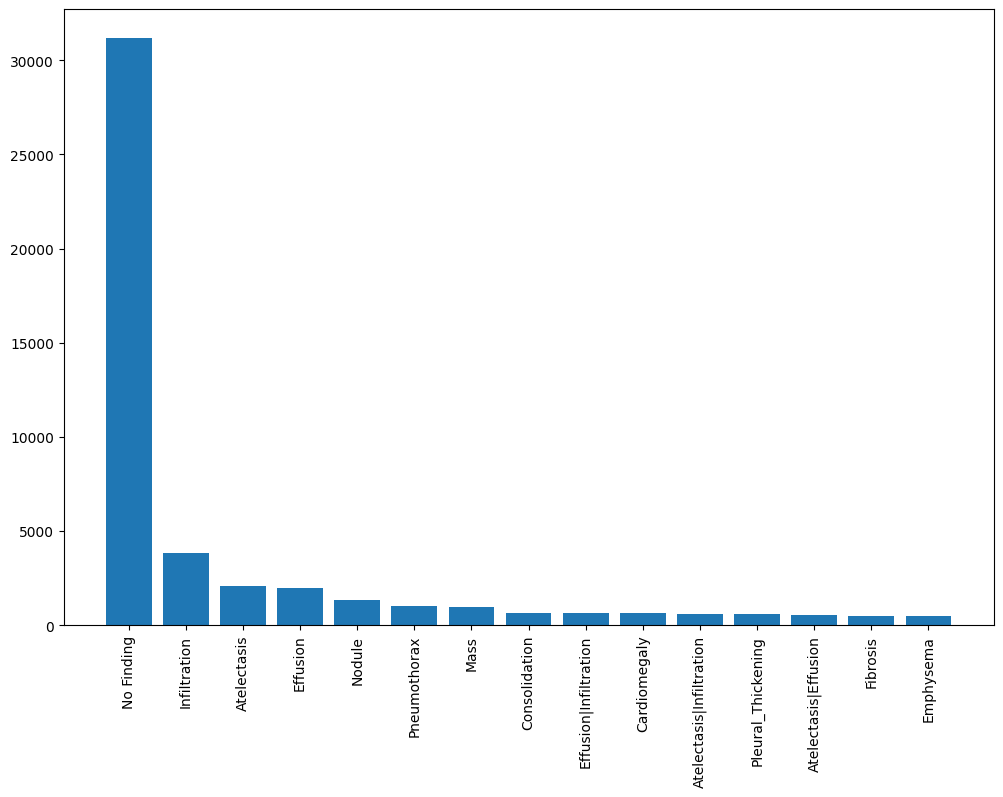

In [5]:
label_counts = df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [6]:
df['No_Finding'] = df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df['Finding Labels'] = df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        df[c_label] = df['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0).astype(int)
df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
22112,00005853_005.png,,5,5853,53,M,AP,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
41739,00010772_015.png,Effusion,15,10772,70,M,PA,2992,2991,0.143,...,1,0,0,0,0,0,0,0,0,0
7951,00002077_000.png,,0,2077,28,F,PA,2544,3056,0.139,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df['View Position'].value_counts()

View Position
PA    32767
AP    22232
Name: count, dtype: int64

In [8]:
df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11',
       'No_Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [9]:
df.drop(['Patient ID','OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],axis=1,inplace=True)

In [10]:
for col in df.drop(['Image Index','Finding Labels','Follow-up #','Patient Age'],axis=1).columns:
    print(df[col].value_counts())

Patient Gender
M    30378
F    24621
Name: count, dtype: int64
No_Finding
1    31161
0    23838
Name: count, dtype: int64
Atelectasis
0    49628
1     5371
Name: count, dtype: int64
Cardiomegaly
0    53533
1     1466
Name: count, dtype: int64
Consolidation
0    52732
1     2267
Name: count, dtype: int64
Edema
0    53955
1     1044
Name: count, dtype: int64
Effusion
0    49108
1     5891
Name: count, dtype: int64
Emphysema
0    53803
1     1196
Name: count, dtype: int64
Fibrosis
0    53944
1     1055
Name: count, dtype: int64
Hernia
0    54859
1      140
Name: count, dtype: int64
Infiltration
0    46547
1     8452
Name: count, dtype: int64
Mass
0    52570
1     2429
Name: count, dtype: int64
Nodule
0    52222
1     2777
Name: count, dtype: int64
Pleural_Thickening
0    53434
1     1565
Name: count, dtype: int64
Pneumonia
0    54344
1      655
Name: count, dtype: int64
Pneumothorax
0    52745
1     2254
Name: count, dtype: int64


In [11]:
df.drop('Finding Labels',axis=1,inplace=True)
df.columns

Index(['Image Index', 'Follow-up #', 'Patient Age', 'Patient Gender',
       'No_Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54999 entries, 0 to 54998
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image Index         54999 non-null  object
 1   Follow-up #         54999 non-null  int64 
 2   Patient Age         54999 non-null  int64 
 3   Patient Gender      54999 non-null  object
 4   No_Finding          54999 non-null  int64 
 5   Atelectasis         54999 non-null  int32 
 6   Cardiomegaly        54999 non-null  int32 
 7   Consolidation       54999 non-null  int32 
 8   Edema               54999 non-null  int32 
 9   Effusion            54999 non-null  int32 
 10  Emphysema           54999 non-null  int32 
 11  Fibrosis            54999 non-null  int32 
 12  Hernia              54999 non-null  int32 
 13  Infiltration        54999 non-null  int32 
 14  Mass                54999 non-null  int32 
 15  Nodule              54999 non-null  int32 
 16  Pleural_Thickening  54

In [13]:
'''def convert_to_years(age):
    if age == 'nan':
        return None
    elif 'Y' in age:
        return int(age.replace('Y', ''))
    elif 'M' in age:
        return int(age.replace('M', '')) // 12
df['Patient Age'] = df['Patient Age'].apply(convert_to_years)
df.dropna(inplace=True)
df['Patient Age'] = df['Patient Age'].astype(int)'''

"def convert_to_years(age):\n    if age == 'nan':\n        return None\n    elif 'Y' in age:\n        return int(age.replace('Y', ''))\n    elif 'M' in age:\n        return int(age.replace('M', '')) // 12\ndf['Patient Age'] = df['Patient Age'].apply(convert_to_years)\ndf.dropna(inplace=True)\ndf['Patient Age'] = df['Patient Age'].astype(int)"

In [14]:
df['Patient Gender'].replace({'M': 1, 'F': 0}, inplace=True)
df.head()

,Image Index,Follow-up #,Patient Age,Patient Gender,No_Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,58,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,58,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,2,58,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,81,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,0,81,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


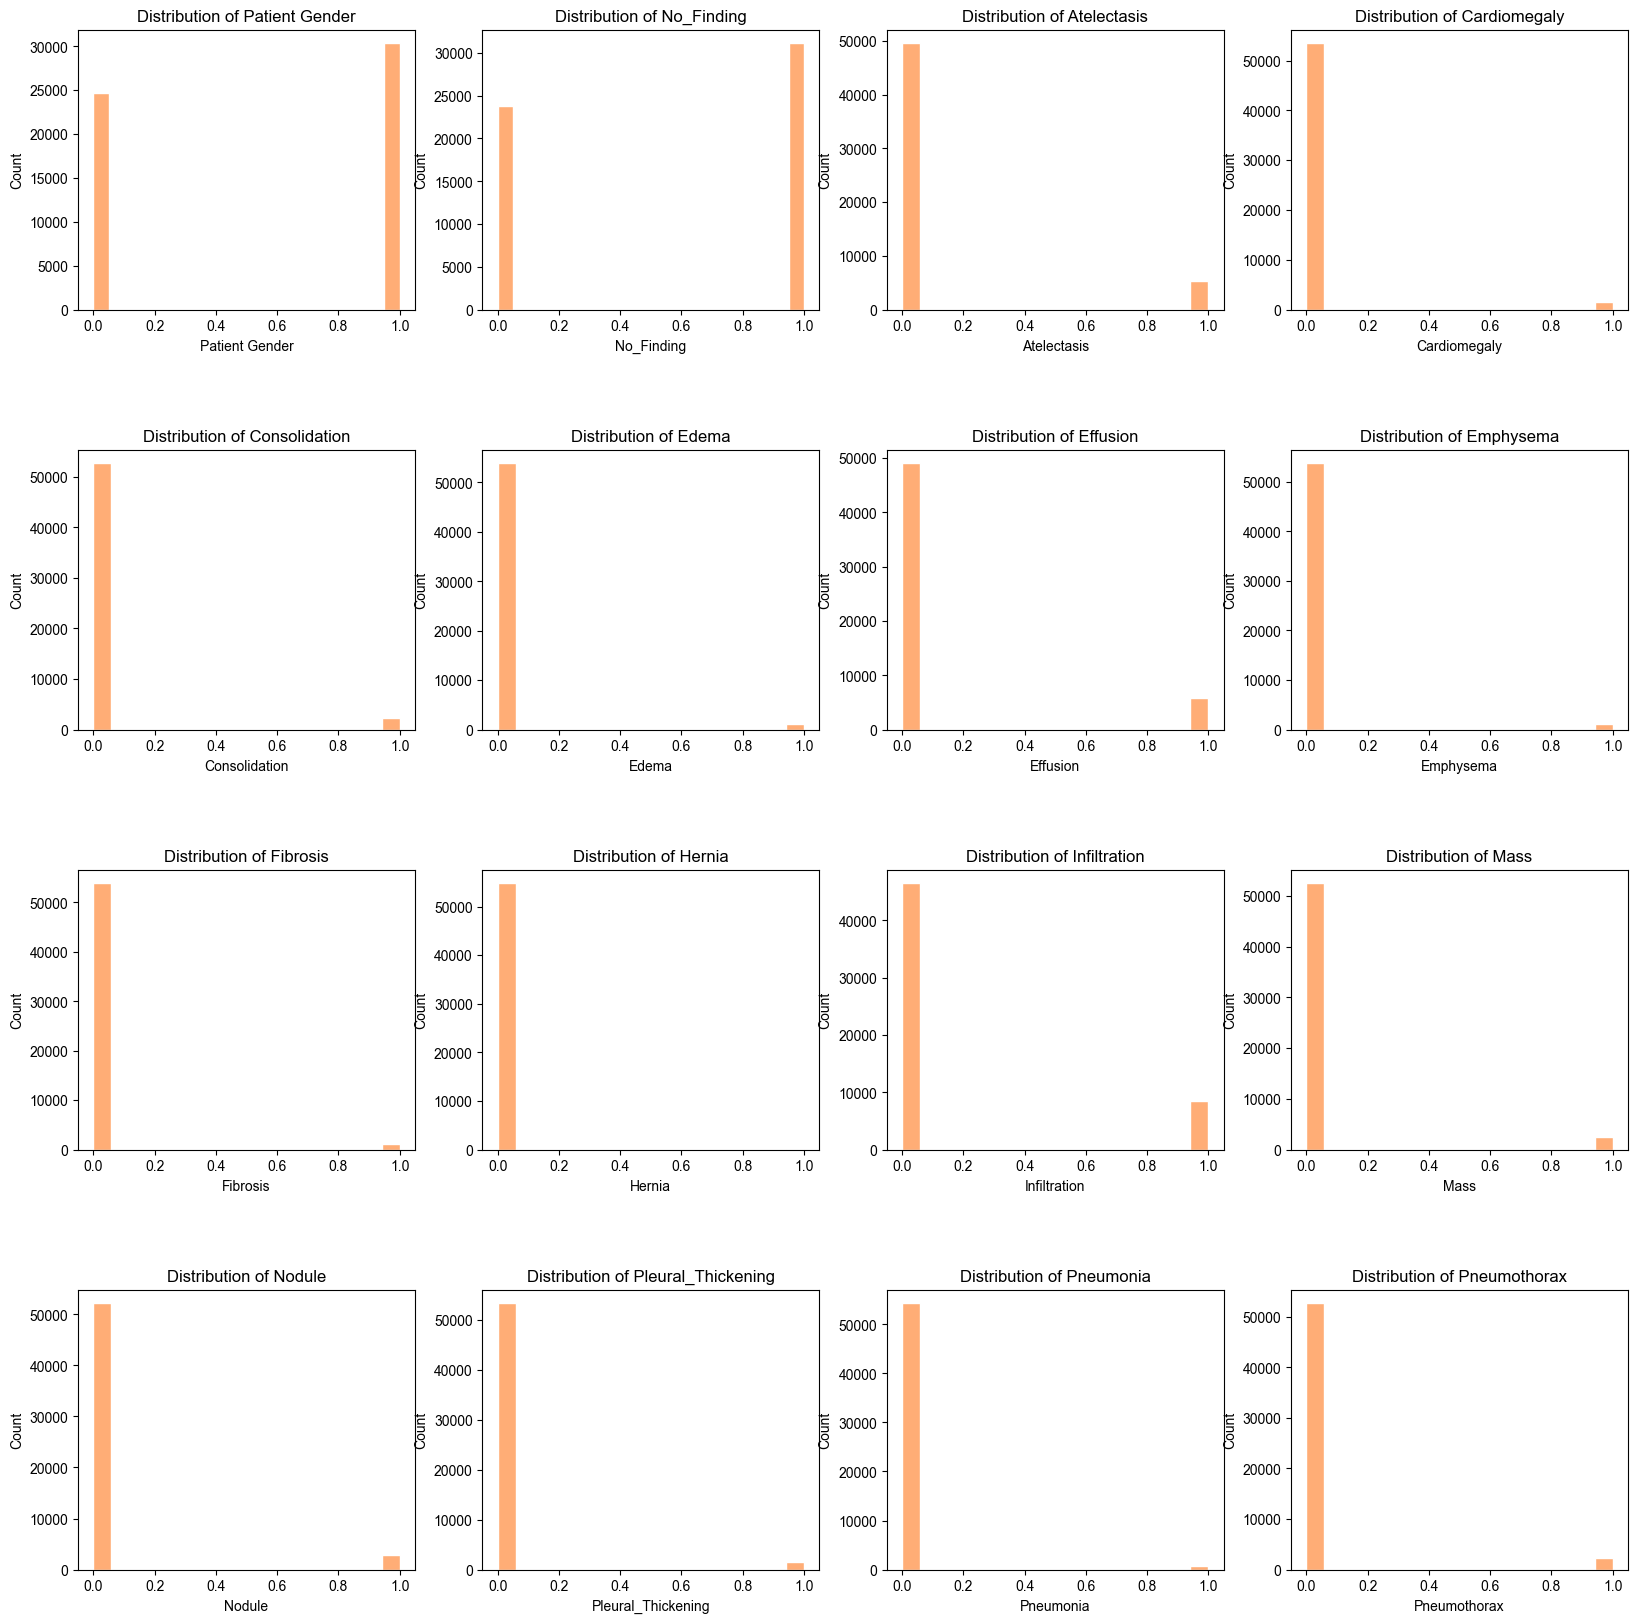

In [15]:
cols = df.drop(['Image Index','Follow-up #','Patient Age'],axis=1).columns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

sns.set(style="darkgrid")
axes = axes.flatten()

for i in range(len(cols)):
        sns.histplot(x=cols[i], data=df, color='#ff9248', ax=axes[i])
        axes[i].set_title(f'Distribution of {cols[i]}')
        axes[i].set_xlabel(cols[i])
        axes[i].set_ylabel('Count')

plt.subplots_adjust(hspace=.5)
plt.show()

In [16]:
df['Patient Age'].replace(411,41,inplace=True)

In [17]:
df[df['Patient Age'] > 100]

,Image Index,Follow-up #,Patient Age,Patient Gender,No_Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,0,412,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
46965,00011973_002.png,2,414,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
48284,00012238_010.png,10,148,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
images_dir = 'D:\\Downloads\\xrays\\images'
image_files = os.listdir(images_dir)
age_gt_100 = df[df['Patient Age'] > 100]['Image Index'].tolist()
removed_num = 0
for filename in image_files:
    if filename in age_gt_100:
        file_path = os.path.join(images_dir, filename)
        os.remove(file_path)
        removed_num += 1
df = df[~df['Image Index'].isin(age_gt_100)]
print(removed_num,'images removed')

0 images removed


In [19]:
df['Patient Age'].sort_values() 

38783     1
39077     1
50004     1
25266     1
45965     1
         ..
5358     93
39016    93
578      94
576      94
577      94
Name: Patient Age, Length: 54996, dtype: int64

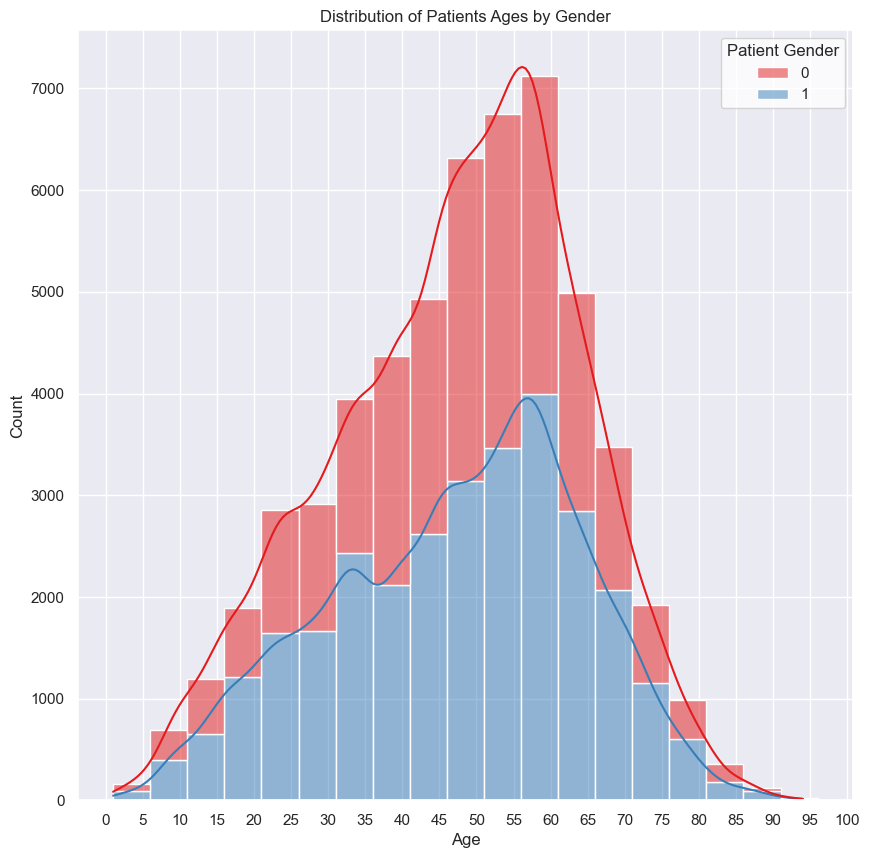

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.histplot(data=df, x='Patient Age', bins=range(df['Patient Age'].min(), min(df['Patient Age'].max(), 100) + 5, 5),
             hue='Patient Gender', multiple='stack', palette='Set1', kde=True)
plt.title(f'Distribution of Patients Ages by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 101, 5))

plt.subplots_adjust(hspace=.5)
plt.show()

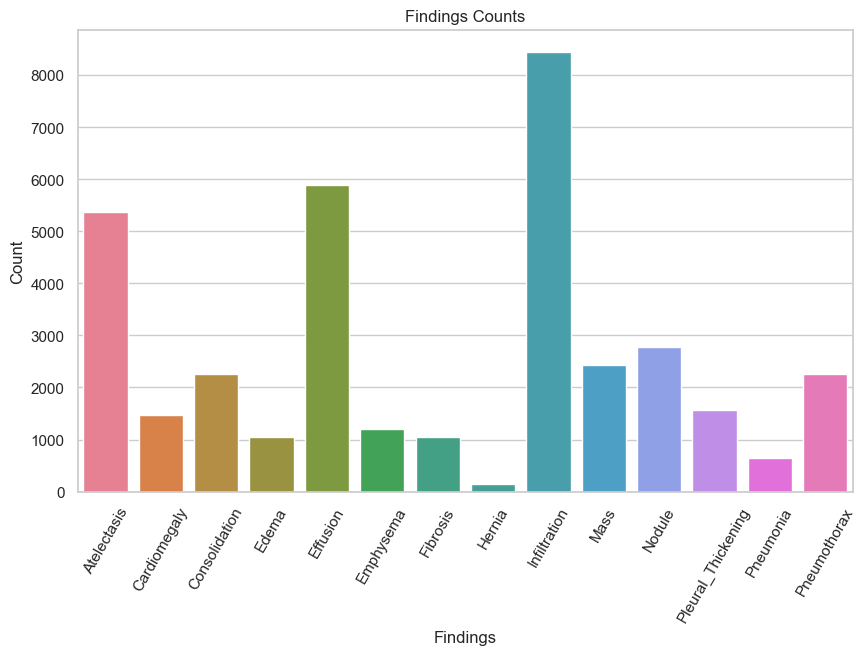

In [21]:
case_cols = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
counts = df[case_cols].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, hue=counts.index, y=counts.values,palette='husl')
plt.title('Findings Counts')
plt.xlabel('Findings')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

In [22]:
df.drop(columns=['Hernia','Follow-up #'],axis=1,inplace=True)
df.head()

,Image Index,Patient Age,Patient Gender,No_Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,58,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,58,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,00000001_002.png,58,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,00000002_000.png,81,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df.shape

(54996, 17)

In [24]:
filename = 'xrays1_6.csv'
if not os.path.exists(filename):
    df.to_csv(filename,index=False)

In [25]:
df.columns

Index(['Image Index', 'Patient Age', 'Patient Gender', 'No_Finding',
       'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [26]:
df['No_Finding'].value_counts()

No_Finding
1    31160
0    23836
Name: count, dtype: int64